# Melanoma Health Disparities Analysis

A personal project examining racial disparities in melanoma survival outcomes using SEER cancer registry data.

### Purpose
This notebook explores patterns and relationships in the SEER dataset:
- Distributions of key variables
- Crosstabs of race with other variables
- Data visualizations

### Dataset

**Source:** SEER Research Data, 17 Registries, Nov 2024 Sub (2000-2022)  
**Final sample:** 226,696 cutaneous melanoma cases across 13 variables

The data has been processed to include only:
- Microscopy-confirmed malignant cutaneous melanoma
- Known stage at diagnosis
- First primary tumors only
- Known survival time
- Known race

**Note:** Individual patient-level data cannot be shared publicly per SEER Research Data Agreement. 
<br>Instructions for requesting access and recreating this dataset can be found in the [data README](../data/README.md).

### Research Question

Are melanoma survival disparities by race explained by later stage at diagnosis and socioeconomic factors, or do disparities persist independent of these factors?

### Analysis Workflow

This is the second notebook in a three-part series:

1. **01_data_cleaning.ipynb** - Data cleaning and filtering
2. **02_exploratory_analysis.ipynb** *(this notebook)* - Exploratory data analysis and visualization
3. **03_survival_analysis.ipynb** - Kaplan-Meier curves and Cox regression models

### GitHub Repository

**GitHub:** https://github.com/kpannoni/melanoma-project

---

## Step 1: Load the cleaned dataset
Load the cleaned dataset that we filtered and processed in the first notebook `01_data_cleaning.ipynb`.

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
mel_data = pd.read_csv('../data/melanoma_data_clean.csv', header=0, low_memory=False)

# Quick verification
print(f"Dataset loaded: {len(mel_data):,} cases")
print(f"Variables: {mel_data.shape[1]}")
print(f"\nColumn names:")
print(mel_data.columns.tolist())


Dataset loaded: 226,696 cases
Variables: 14

Column names:
['age_group', 'sex', 'race', 'year_diag', 'survival_months', 'stage', 'cause_death', 'vital_status', 'histology', 'primary_site', 'marital_status', 'median_income', 'rural_urban', 'race_labels']


## Step 2: Look at the distribution of patient survival time and outcome by race
Take a look at the distributions of survival time, cancer stage, and vital status to establish a baseline for disparities in patient outcomes.

Average survival time by race: 
                                 count  median   std
Black                            1027      76  75.2
Asian or Pacific Islander        1598      95  76.1
Hispanic                         8077     101  73.8
American Indian/Alaska Native     575     110  73.5
White                          215419     115  71.4 



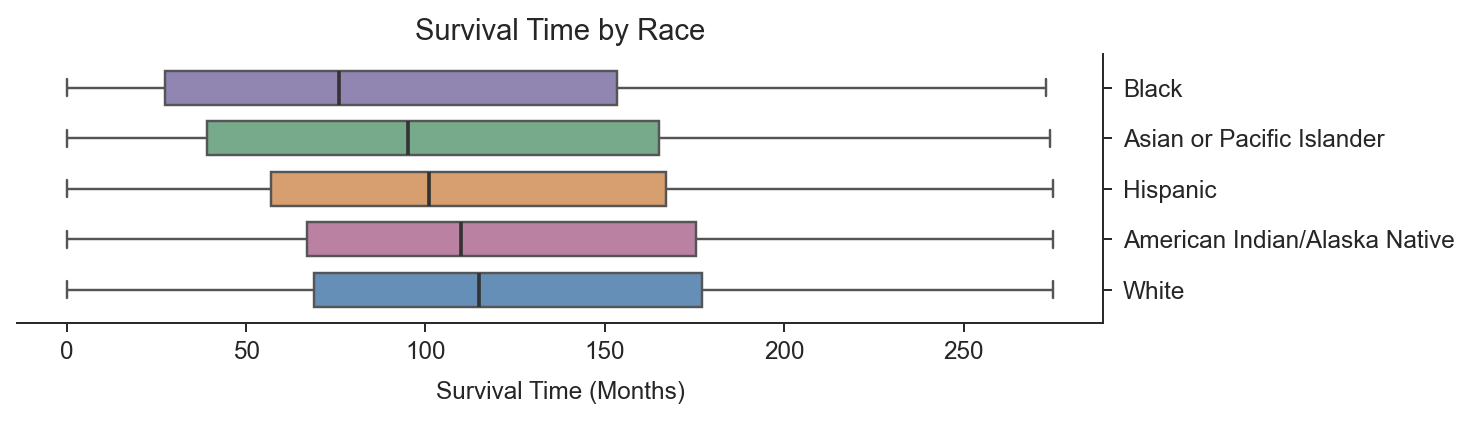

In [317]:
# Show the summary statistics for survival time by race
survival_by_race = round(mel_data.groupby('race_labels')['survival_months'].describe()[['count','50%','std']],1)
survival_by_race = survival_by_race.rename(columns={'50%': 'median'}) # rename median column
survival_by_race[['count', 'median']] = survival_by_race[['count', 'median']].astype(int)

# Sort by average survival time descending
survival_by_race = survival_by_race.sort_values(by='median')
# remove the index name for display purposes
survival_by_race.index.name = None

print("Average survival time by race: \n", survival_by_race, "\n")

# Create a boxplot to show the distribution of survival time by race

# Set up the plot aesthetics
sns.set_style("ticks")
custom_pal = ['#5790c4', '#e89c5e', '#6db388', '#c377a3', '#8c7fb8']

# get the order to plot the data from the summary stats table (ordered by median)
order = survival_by_race.index.tolist()

plt.figure(figsize=(8, 2), dpi=175)
# Create the box plot
sns.boxplot(data=mel_data, x='survival_months', y='race_labels', hue='race_labels', order=order,
             palette=custom_pal, gap=0.15, medianprops=dict(color='#333333', linewidth=1.5, solid_capstyle='butt'))

# Move the x-axis to the right for aesthetics
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# remove the left axis lines, keep the right
sns.despine(left=True, right=False)

# Force ticks to show on the right
ax.tick_params(axis='y', which='both', right=True, left=False, pad=5)
# Adjust the y axis margins
plt.margins(y=0.07)

# Properly title the plot and the axes
plt.xlabel("Survival Time (Months)", fontsize=10, labelpad=7)
plt.ylabel(None)
plt.title("Survival Time by Race", fontsize=12)

plt.show()


### Create crosstabs of patient outcomes by race